In [2]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [3]:
parks = gpd.read_file('../data/Metro Parks Boundaries (GIS).geojson')
print(parks.crs)
parks.head( )

EPSG:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [4]:
type(parks)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


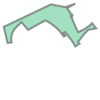

In [5]:
parks.loc[0, 'geometry']

#### ...and printing it


In [6]:
print(parks.loc[0, 'geometry'])

MULTIPOLYGON (((-86.9554652476398 36.079301455798536, -86.95577768867267 36.079139093437696, -86.95554165522448 36.07881679726515, -86.95555002481612 36.078763362963265, -86.95547131924887 36.078720729617956, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.078391071735794, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.078294075262384, -86.95521421491281 36.078266384907266, -86.9552084636451 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.078153868812706, -86.95519898519579 36.078125575091285, -86.95519999833 36.07809727154806, -86.95520236476608 36.078068956381045, -86.9552057503346 36.078040908937375, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.078130121682676, -86.95500338104712 36.0780332215624

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


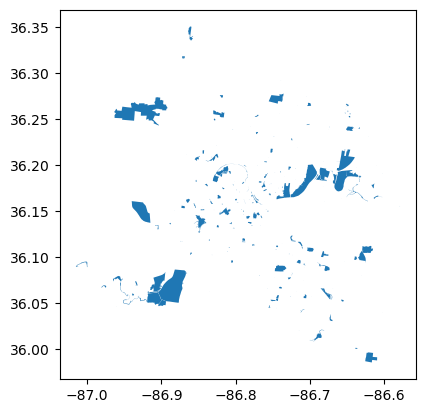

In [7]:
parks.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


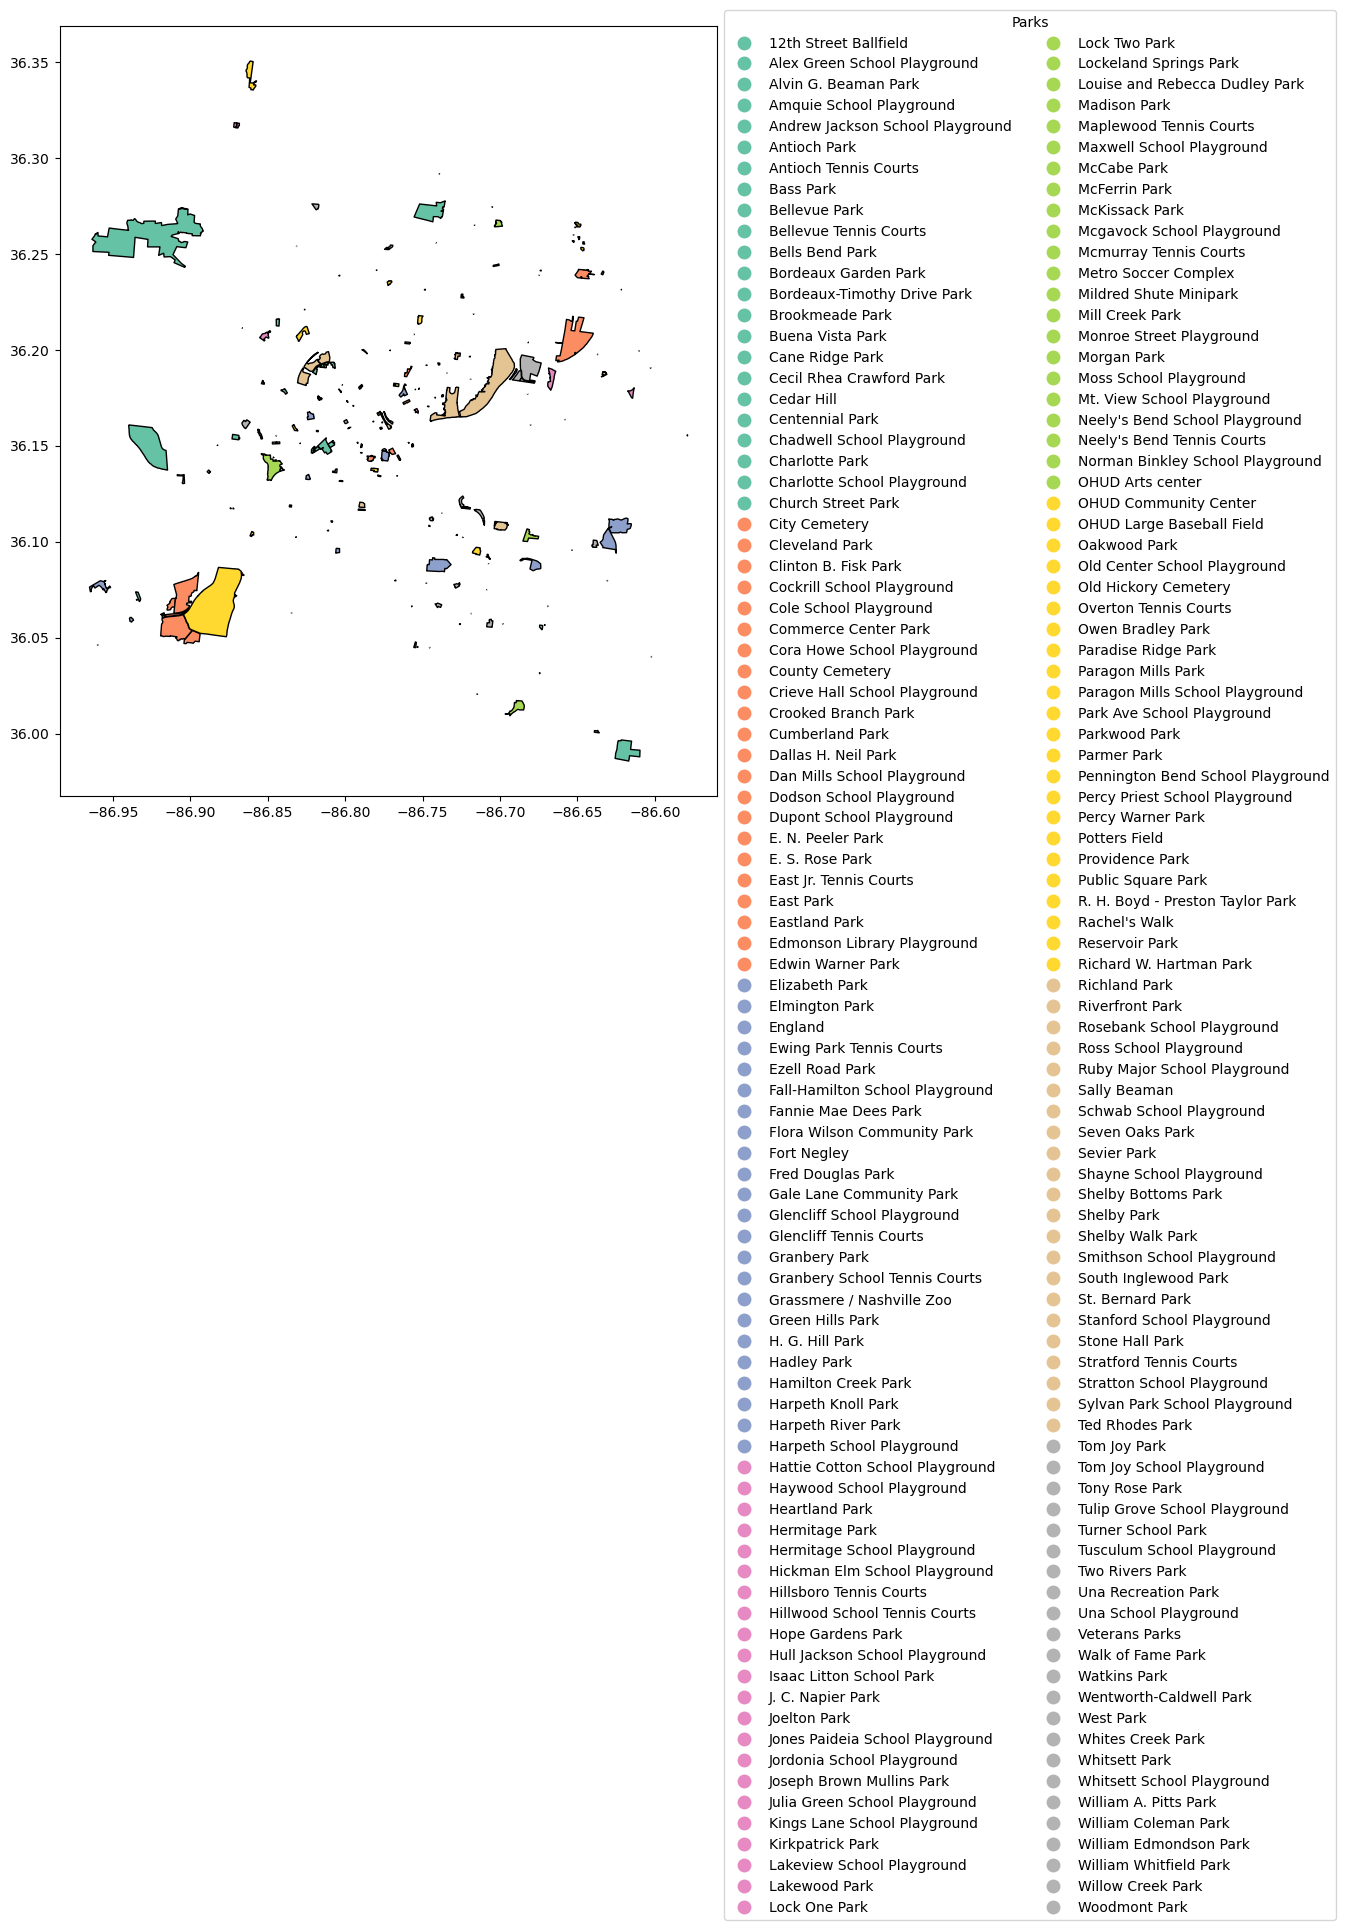

In [8]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [9]:
hydration = gpd.read_file('../data/Public Water Fountains and Hydration Systems (GIS).geojson')
print(hydration.crs)
hydration.head( )

EPSG:4326


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)


In [11]:
hydration.drop(columns=['location'])

,name,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)
...,...,...,...,...,...,...,...,...,...
68,Harpeth River Greenway,Y,0,36.05899273,N,1,-86.94508441,Standard/ADA/Bottle Filler,POINT (-86.94508 36.05899)
69,Harpeth River Greenway,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133)
70,River Landing,N,0,36.16412161,Y,1,-86.77223047,Standard/ADA,POINT (-86.77223 36.16412)
71,Ascend Amphiteater Water Fountain,N,0,36.16014227,N,1,-86.77120998,Standard/ADA/Bottle Filler,POINT (-86.77121 36.16014)


In [12]:
hydration.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   location   65 non-null     object  
 2   dog        73 non-null     object  
 3   objectid   73 non-null     object  
 4   lon        73 non-null     object  
 5   ada        73 non-null     object  
 6   cnt        73 non-null     object  
 7   lat        73 non-null     object  
 8   feat_type  73 non-null     object  
 9   geometry   73 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 5.8+ KB


- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [13]:
hydration.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [9]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))

In [1]:
type(bus_geo)

NameError: name 'bus_geo' is not defined

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [14]:
parks_clean = parks[['name', 'geometry']]

In [15]:
hydration_by_park = gpd.sjoin(hydration, parks_clean, predicate = 'within')

In [17]:
hydration_by_park = hydration_by_park.drop(columns=['location'])

In [18]:
hydration_by_park.head()

,name_left,dog,objectid,lon,ada,cnt,lat,feat_type,geometry,index_right,name_right
0,Beaman Water Fountain,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),4,Alvin G. Beaman Park
1,Edwin Nature Center Water Fountain,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),5,Edwin Warner Park
29,Edwin Warner Dog Park Water Fountain,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),5,Edwin Warner Park
30,Edwin Warner Concession Water Fountain,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),5,Edwin Warner Park
69,Harpeth River Greenway,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133),5,Edwin Warner Park


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [19]:
hydration_by_park['name_right'].value_counts()

name_right
Riverfront Park                5
Edwin Warner Park              4
Cedar Hill                     4
Shelby Bottoms Park            3
Cane Ridge Park                3
Fannie Mae Dees Park           3
Shelby Park                    3
Two Rivers Park                2
Sevier Park                    2
McCabe Park                    2
Hadley Park                    1
Hermitage Park                 1
Isaac Litton School Park       1
Alvin G. Beaman Park           1
Parmer Park                    1
Elmington Park                 1
E. N. Peeler Park              1
Woodmont Park                  1
Bellevue Park                  1
City Cemetery                  1
Ted Rhodes Park                1
Fort Negley                    1
Bordeaux-Timothy Drive Park    1
Elizabeth Park                 1
Cumberland Park                1
Buena Vista Park               1
Bordeaux Garden Park           1
Bells Bend Park                1
England                        1
Seven Oaks Park                1

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [20]:
hydration_in_riverfront = hydration_by_park.loc[hydration_by_park['name_right'] == 'Riverfront Park']
hydration_in_riverfront.shape

(5, 11)

In [21]:
parks_riverfront = parks_clean.loc[parks_clean['name'] == 'Riverfront Park']
parks_riverfront.shape

(4, 2)

In [29]:
hydration_in_riverfront

,name_left,dog,objectid,lon,ada,cnt,lat,feat_type,geometry,index_right,name_right
21,Ascend Amphiteater Water Fountain,N,46586,36.1589887,N,1,-86.77188799,Standard/ADA/Bottle Filler,POINT (-86.77189 36.15899),184,Riverfront Park
44,Ascend Fitness Area Water Fountain,N,46633,36.15935444,N,1,-86.77052029,Standard/ADA/Bottle Filler,POINT (-86.77052 36.15935),184,Riverfront Park
45,Acend Dog Park Water Fountain,Y,46634,36.16105409,N,1,-86.77310593,Standard/ADA/Bottle Filler,POINT (-86.77311 36.16105),184,Riverfront Park
46,Acend Dog Park Water Fountain,Y,46635,36.16093199,N,1,-86.77307034,Standard/ADA/Bottle Filler,POINT (-86.77307 36.16093),184,Riverfront Park
71,Ascend Amphiteater Water Fountain,N,0,36.16014227,N,1,-86.77120998,Standard/ADA/Bottle Filler,POINT (-86.77121 36.16014),184,Riverfront Park


#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

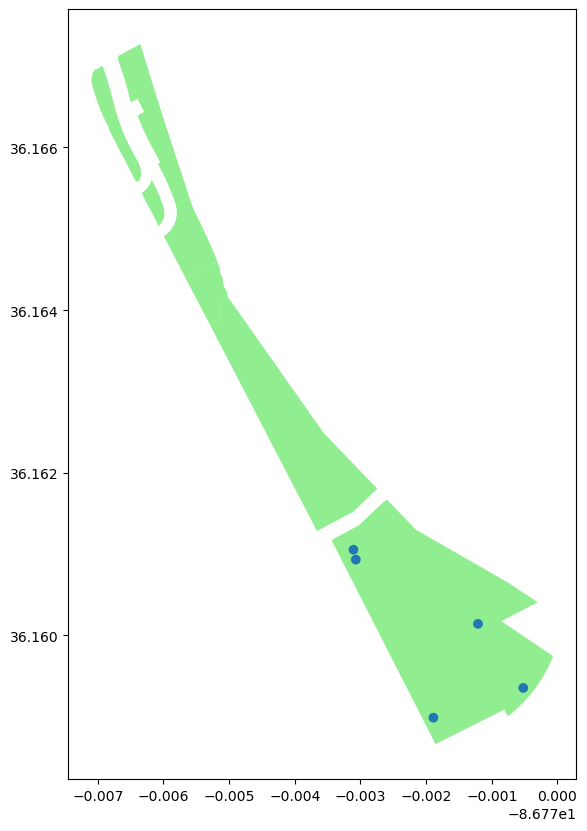

In [22]:
#fig, ax = matplotlib.subplots()
ax = parks_riverfront.plot(figsize = (8, 10), color = 'lightgreen')
hydration_in_riverfront.plot( ax = ax, column = 'name_right');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [23]:
parks_riverfront.geometry.centroid

C:\Users\AaronH\AppData\Local\Temp\ipykernel_28148\869443057.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks_riverfront.geometry.centroid


53     POINT (-86.77611 36.16584)
55     POINT (-86.77530 36.16424)
59     POINT (-86.77404 36.16256)
184    POINT (-86.77175 36.16015)
dtype: geometry

In [24]:
#find the center of the larger (more southern) polygon and look at it
center = parks_riverfront.geometry.centroid[59]
print(center)

POINT (-86.77404464109055 36.16255994309812)


C:\Users\AaronH\AppData\Local\Temp\ipykernel_28148\3489103705.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = parks_riverfront.geometry.centroid[59]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [25]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16255994309812, -86.77404464109055]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [26]:
#create our map of Nashville Zip Code 37207 and show it
map_riverfront = folium.Map(location =  area_center, zoom_start = 12)
map_riverfront

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [27]:
i = 0
for row_index, row_values in hydration_in_riverfront.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 21
values are:
 
name_left                 Ascend Amphiteater Water Fountain
dog                                                       N
objectid                                              46586
lon                                              36.1589887
ada                                                       N
cnt                                                       1
lat                                            -86.77188799
feat_type                        Standard/ADA/Bottle Filler
geometry       POINT (-86.77188799128072 36.15898870023951)
index_right                                             184
name_right                                  Riverfront Park
Name: 21, dtype: object
------------------------- 
index is 44
values are:
 
name_left                Ascend Fitness Area Water Fountain
dog                                                       N
objectid                                              46633
lon                                             36.159354

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [65]:

map_riverfront_test = folium.Map(location =  area_center, zoom_start = 15)

folium.GeoJson(hydration_in_riverfront).add_to(map_riverfront_test)

for row_index, row_values in hydration_in_riverfront.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values["name_left"])
    icon = folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_riverfront_test)
map_riverfront_test.save('../maps/map_riverfront2.html')

#display our map
map_riverfront_test

In [ ]:

map_riverfront_test = folium.Map(location =  area_center, zoom_start = 15)

folium.GeoJson(hydration_in_riverfront).add_to(map_riverfront_test)

for row_index, row_values in hydration_in_riverfront.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values["name_left"])
    icon = folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_riverfront_test)
map_riverfront_test.save('../maps/map_riverfront2.html')

#display our map
map_riverfront_test

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [31]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [29]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [28]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207